# 导入相关库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
rc ={'font.sans-serif':'SimHei','axes.unicode_minus':False} 
sns.set(context='notebook', style='ticks', rc=rc)

# 读数据

In [3]:
data = pd.read_excel('./2023年中国研究生数学建模竞赛赛题/E题/data3b.xlsx')
data_image = pd.read_excel('./2023年中国研究生数学建模竞赛赛题/E题/竞赛发布数据/表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx')

In [4]:
data = data.rename(columns={'入院首次影像检查流水号':'流水号'})

In [5]:
data[['流水号', '随访1流水号', '随访2流水号', '随访3流水号', '随访4流水号', '随访5流水号', '随访6流水号', '随访7流水号', '随访8流水号']] = data[['流水号', '随访1流水号', '随访2流水号', '随访3流水号', '随访4流水号', '随访5流水号', '随访6流水号', '随访7流水号', '随访8流水号']].fillna(0)

In [6]:
date_dict = {'流水号': ['HM_volume', 'HM_ACA_R_Ratio', 'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 
                        'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 
                        'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 
                        'HM_Cerebellum_L_Ratio', 'ED_volume', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 
                        'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 
                        'ED_ACA_L_Ratio', 'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 
                        'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio'], 
             '随访1流水号': ['HM_volume.1', 'HM_ACA_R_Ratio.1', 'HM_MCA_R_Ratio.1', 'HM_PCA_R_Ratio.1', 
                        'HM_Pons_Medulla_R_Ratio.1', 'HM_Cerebellum_R_Ratio.1', 'HM_ACA_L_Ratio.1', 
                        'HM_MCA_L_Ratio.1', 'HM_PCA_L_Ratio.1', 'HM_Pons_Medulla_L_Ratio.1', 
                        'HM_Cerebellum_L_Ratio.1', 'ED_volume.1', 'ED_ACA_R_Ratio.1', 'ED_MCA_R_Ratio.1', 
                        'ED_PCA_R_Ratio.1', 'ED_Pons_Medulla_R_Ratio.1', 'ED_Cerebellum_R_Ratio.1', 
                        'ED_ACA_L_Ratio.1', 'ED_MCA_L_Ratio.1', 'ED_PCA_L_Ratio.1', 
                        'ED_Pons_Medulla_L_Ratio.1', 'ED_Cerebellum_L_Ratio.1'], 
             '随访2流水号': ['HM_volume.2', 'HM_ACA_R_Ratio.2', 'HM_MCA_R_Ratio.2', 'HM_PCA_R_Ratio.2', 
                        'HM_Pons_Medulla_R_Ratio.2', 'HM_Cerebellum_R_Ratio.2', 'HM_ACA_L_Ratio.2', 
                        'HM_MCA_L_Ratio.2', 'HM_PCA_L_Ratio.2', 'HM_Pons_Medulla_L_Ratio.2', 
                        'HM_Cerebellum_L_Ratio.2', 'ED_volume.2', 'ED_ACA_R_Ratio.2', 'ED_MCA_R_Ratio.2', 
                        'ED_PCA_R_Ratio.2', 'ED_Pons_Medulla_R_Ratio.2', 'ED_Cerebellum_R_Ratio.2', 
                        'ED_ACA_L_Ratio.2', 'ED_MCA_L_Ratio.2', 'ED_PCA_L_Ratio.2', 
                        'ED_Pons_Medulla_L_Ratio.2', 'ED_Cerebellum_L_Ratio.2'], 
             '随访3流水号': ['HM_volume.3', 'HM_ACA_R_Ratio.3', 'HM_MCA_R_Ratio.3', 'HM_PCA_R_Ratio.3', 
                        'HM_Pons_Medulla_R_Ratio.3', 'HM_Cerebellum_R_Ratio.3', 'HM_ACA_L_Ratio.3', 
                        'HM_MCA_L_Ratio.3', 'HM_PCA_L_Ratio.3', 'HM_Pons_Medulla_L_Ratio.3', 
                        'HM_Cerebellum_L_Ratio.3', 'ED_volume.3', 'ED_ACA_R_Ratio.3', 'ED_MCA_R_Ratio.3', 
                        'ED_PCA_R_Ratio.3', 'ED_Pons_Medulla_R_Ratio.3', 'ED_Cerebellum_R_Ratio.3', 
                        'ED_ACA_L_Ratio.3', 'ED_MCA_L_Ratio.3', 'ED_PCA_L_Ratio.3', 
                        'ED_Pons_Medulla_L_Ratio.3', 'ED_Cerebellum_L_Ratio.3'], 
             '随访4流水号': ['HM_volume.4', 'HM_ACA_R_Ratio.4', 'HM_MCA_R_Ratio.4', 'HM_PCA_R_Ratio.4', 
                        'HM_Pons_Medulla_R_Ratio.4', 'HM_Cerebellum_R_Ratio.4', 'HM_ACA_L_Ratio.4', 
                        'HM_MCA_L_Ratio.4', 'HM_PCA_L_Ratio.4', 'HM_Pons_Medulla_L_Ratio.4', 
                        'HM_Cerebellum_L_Ratio.4', 'ED_volume.4', 'ED_ACA_R_Ratio.4', 'ED_MCA_R_Ratio.4', 
                        'ED_PCA_R_Ratio.4', 'ED_Pons_Medulla_R_Ratio.4', 'ED_Cerebellum_R_Ratio.4', 
                        'ED_ACA_L_Ratio.4', 'ED_MCA_L_Ratio.4', 'ED_PCA_L_Ratio.4', 
                        'ED_Pons_Medulla_L_Ratio.4', 'ED_Cerebellum_L_Ratio.4'], 
             '随访5流水号': ['HM_volume.5', 'HM_ACA_R_Ratio.5', 'HM_MCA_R_Ratio.5', 'HM_PCA_R_Ratio.5', 
                        'HM_Pons_Medulla_R_Ratio.5', 'HM_Cerebellum_R_Ratio.5', 'HM_ACA_L_Ratio.5', 
                        'HM_MCA_L_Ratio.5', 'HM_PCA_L_Ratio.5', 'HM_Pons_Medulla_L_Ratio.5', 
                        'HM_Cerebellum_L_Ratio.5', 'ED_volume.5', 'ED_ACA_R_Ratio.5', 'ED_MCA_R_Ratio.5', 
                        'ED_PCA_R_Ratio.5', 'ED_Pons_Medulla_R_Ratio.5', 'ED_Cerebellum_R_Ratio.5', 
                        'ED_ACA_L_Ratio.5', 'ED_MCA_L_Ratio.5', 'ED_PCA_L_Ratio.5', 
                        'ED_Pons_Medulla_L_Ratio.5', 'ED_Cerebellum_L_Ratio.5'], 
             '随访6流水号': ['HM_volume.6', 'HM_ACA_R_Ratio.6', 'HM_MCA_R_Ratio.6', 'HM_PCA_R_Ratio.6', 
                        'HM_Pons_Medulla_R_Ratio.6', 'HM_Cerebellum_R_Ratio.6', 'HM_ACA_L_Ratio.6', 
                        'HM_MCA_L_Ratio.6', 'HM_PCA_L_Ratio.6', 'HM_Pons_Medulla_L_Ratio.6', 
                        'HM_Cerebellum_L_Ratio.6', 'ED_volume.6', 'ED_ACA_R_Ratio.6', 'ED_MCA_R_Ratio.6', 
                        'ED_PCA_R_Ratio.6', 'ED_Pons_Medulla_R_Ratio.6', 'ED_Cerebellum_R_Ratio.6', 
                        'ED_ACA_L_Ratio.6', 'ED_MCA_L_Ratio.6', 'ED_PCA_L_Ratio.6', 
                        'ED_Pons_Medulla_L_Ratio.6', 'ED_Cerebellum_L_Ratio.6'], 
             '随访7流水号': ['HM_volume.7', 'HM_ACA_R_Ratio.7', 'HM_MCA_R_Ratio.7', 'HM_PCA_R_Ratio.7', 
                        'HM_Pons_Medulla_R_Ratio.7', 'HM_Cerebellum_R_Ratio.7', 'HM_ACA_L_Ratio.7', 
                        'HM_MCA_L_Ratio.7', 'HM_PCA_L_Ratio.7', 'HM_Pons_Medulla_L_Ratio.7', 
                        'HM_Cerebellum_L_Ratio.7', 'ED_volume.7', 'ED_ACA_R_Ratio.7', 'ED_MCA_R_Ratio.7', 
                        'ED_PCA_R_Ratio.7', 'ED_Pons_Medulla_R_Ratio.7', 'ED_Cerebellum_R_Ratio.7', 
                        'ED_ACA_L_Ratio.7', 'ED_MCA_L_Ratio.7', 'ED_PCA_L_Ratio.7', 
                        'ED_Pons_Medulla_L_Ratio.7', 'ED_Cerebellum_L_Ratio.7'], 
             '随访8流水号': ['HM_volume.8', 'HM_ACA_R_Ratio.8', 'HM_MCA_R_Ratio.8', 'HM_PCA_R_Ratio.8', 
                        'HM_Pons_Medulla_R_Ratio.8', 'HM_Cerebellum_R_Ratio.8', 'HM_ACA_L_Ratio.8', 
                        'HM_MCA_L_Ratio.8', 'HM_PCA_L_Ratio.8', 'HM_Pons_Medulla_L_Ratio.8', 
                        'HM_Cerebellum_L_Ratio.8', 'ED_volume.8', 'ED_ACA_R_Ratio.8', 'ED_MCA_R_Ratio.8', 
                        'ED_PCA_R_Ratio.8', 'ED_Pons_Medulla_R_Ratio.8', 'ED_Cerebellum_R_Ratio.8', 
                        'ED_ACA_L_Ratio.8', 'ED_MCA_L_Ratio.8', 'ED_PCA_L_Ratio.8', 
                        'ED_Pons_Medulla_L_Ratio.8', 'ED_Cerebellum_L_Ratio.8']}

In [7]:
feature1 = []
feature2 = []
for i in data.iterrows():
    feat1 = []
    feat2 = []
    i = i[1]
    for num in date_dict:
        if i[num] == 0:
            break
        else:
            check = i[num]
            feat1.append(list(i[date_dict[num]].values))
            image_d = list(data_image.query("流水号 == @check").values.reshape(-1)[1:])
            if len(image_d) != 0:
                feat2.append(image_d)
    feature1.append(np.mean(feat1, axis=0))
    feature2.append(np.mean(feat2, axis=0))

In [8]:
feature1_name = ['HM_volume_mean', 'HM_ACA_R_Ratio_mean', 'HM_MCA_R_Ratio_mean', 'HM_PCA_R_Ratio_mean', 
                 'HM_Pons_Medulla_R_Ratio_mean', 'HM_Cerebellum_R_Ratio_mean', 'HM_ACA_L_Ratio_mean', 
                 'HM_MCA_L_Ratio_mean', 'HM_PCA_L_Ratio_mean', 'HM_Pons_Medulla_L_Ratio_mean', 
                 'HM_Cerebellum_L_Ratio_mean', 'ED_volume_mean', 'ED_ACA_R_Ratio_mean', 'ED_MCA_R_Ratio_mean', 
                 'ED_PCA_R_Ratio_mean', 'ED_Pons_Medulla_R_Ratio_mean', 'ED_Cerebellum_R_Ratio_mean', 
                 'ED_ACA_L_Ratio_mean', 'ED_MCA_L_Ratio_mean', 'ED_PCA_L_Ratio_mean', 
                 'ED_Pons_Medulla_L_Ratio_mean', 'ED_Cerebellum_L_Ratio_mean']

feature2_name = ['original_shape_Elongation_mean',
 'original_shape_Flatness_mean',
 'original_shape_LeastAxisLength_mean',
 'original_shape_MajorAxisLength_mean',
 'original_shape_Maximum2DDiameterColumn_mean',
 'original_shape_Maximum2DDiameterRow_mean',
 'original_shape_Maximum2DDiameterSlice_mean',
 'original_shape_Maximum3DDiameter_mean',
 'original_shape_MeshVolume_mean',
 'original_shape_MinorAxisLength_mean',
 'original_shape_Sphericity_mean',
 'original_shape_SurfaceArea_mean',
 'original_shape_SurfaceVolumeRatio_mean',
 'original_shape_VoxelVolume_mean',
 'NCCT_original_firstorder_10Percentile_mean',
 'NCCT_original_firstorder_90Percentile_mean',
 'NCCT_original_firstorder_Energy_mean',
 'NCCT_original_firstorder_Entropy_mean',
 'NCCT_original_firstorder_InterquartileRange_mean',
 'NCCT_original_firstorder_Kurtosis_mean',
 'NCCT_original_firstorder_Maximum_mean',
 'NCCT_original_firstorder_MeanAbsoluteDeviation_mean',
 'NCCT_original_firstorder_Mean_mean',
 'NCCT_original_firstorder_Median_mean',
 'NCCT_original_firstorder_Minimum_mean',
 'NCCT_original_firstorder_Range_mean',
 'NCCT_original_firstorder_RobustMeanAbsoluteDeviation_mean',
 'NCCT_original_firstorder_RootMeanSquared_mean',
 'NCCT_original_firstorder_Skewness_mean',
 'NCCT_original_firstorder_Uniformity_mean',
 'NCCT_original_firstorder_Variance_mean']

In [9]:
df1 = pd.DataFrame(feature1, columns=feature1_name)
df2 = pd.DataFrame(feature2, columns=feature2_name)

In [10]:
data = pd.concat([data[['ID', '90天mRS', '年龄', '性别', '脑出血前mRS评分', '高血压病史', '卒中病史', '糖尿病史', 
                '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔', '血压', '脑室引流', 
                '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']],
                  df1, df2], axis=1)

In [11]:
#data = data.rename(columns={'年龄':'age', '发病到首次影像检查时间间隔':'frist_time_delt', '脑出血前mRS评分':'front_mRs'})

In [12]:
train = data.iloc[:100, :]
test = data.iloc[100:, :]

In [13]:
train['高压'] = train['血压'].apply(lambda x: int(x.split('/')[0]))
train['低压'] = train['血压'].apply(lambda x: int(x.split('/')[1]))
test['高压'] = test['血压'].apply(lambda x: int(x.split('/')[0]))
test['低压'] = test['血压'].apply(lambda x: int(x.split('/')[1]))
train.drop(['血压'], axis=1, inplace=True)
test.drop(['血压'], axis=1, inplace=True)
train['性别'] = train['性别'].map({'男':0, '女':1})
test['性别'] = test['性别'].map({'男':0, '女':1})

In [14]:
drop_cols = ['ID', '90天mRS']
cate_cols = ['性别', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '脑室引流', 
            '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经']
num_cols = [i for i in train.columns if i not in drop_cols + cate_cols]

In [15]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [16]:
train.head()

,ID,90天mRS,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,HM_volume_mean,HM_ACA_R_Ratio_mean,HM_MCA_R_Ratio_mean,HM_PCA_R_Ratio_mean,HM_Pons_Medulla_R_Ratio_mean,HM_Cerebellum_R_Ratio_mean,HM_ACA_L_Ratio_mean,HM_MCA_L_Ratio_mean,HM_PCA_L_Ratio_mean,HM_Pons_Medulla_L_Ratio_mean,HM_Cerebellum_L_Ratio_mean,ED_volume_mean,ED_ACA_R_Ratio_mean,ED_MCA_R_Ratio_mean,ED_PCA_R_Ratio_mean,ED_Pons_Medulla_R_Ratio_mean,ED_Cerebellum_R_Ratio_mean,ED_ACA_L_Ratio_mean,ED_MCA_L_Ratio_mean,ED_PCA_L_Ratio_mean,ED_Pons_Medulla_L_Ratio_mean,ED_Cerebellum_L_Ratio_mean,original_shape_Elongation_mean,original_shape_Flatness_mean,original_shape_LeastAxisLength_mean,original_shape_MajorAxisLength_mean,original_shape_Maximum2DDiameterColumn_mean,original_shape_Maximum2DDiameterRow_mean,original_shape_Maximum2DDiameterSlice_mean,original_shape_Maximum3DDiameter_mean,original_shape_MeshVolume_mean,original_shape_MinorAxisLength_mean,original_shape_Sphericity_mean,original_shape_SurfaceArea_mean,original_shape_SurfaceVolumeRatio_mean,original_shape_VoxelVolume_mean,NCCT_original_firstorder_10Percentile_mean,NCCT_original_firstorder_90Percentile_mean,NCCT_original_firstorder_Energy_mean,NCCT_original_firstorder_Entropy_mean,NCCT_original_firstorder_InterquartileRange_mean,NCCT_original_firstorder_Kurtosis_mean,NCCT_original_firstorder_Maximum_mean,NCCT_original_firstorder_MeanAbsoluteDeviation_mean,NCCT_original_firstorder_Mean_mean,NCCT_original_firstorder_Median_mean,NCCT_original_firstorder_Minimum_mean,NCCT_original_firstorder_Range_mean,NCCT_original_firstorder_RobustMeanAbsoluteDeviation_mean,NCCT_original_firstorder_RootMeanSquared_mean,NCCT_original_firstorder_Skewness_mean,NCCT_original_firstorder_Uniformity_mean,NCCT_original_firstorder_Variance_mean,高压,低压
0,sub001,4.0,-1.509811,1,-0.193247,0,0,0,0,0,0,0,-0.213264,0,1,1,1,1,1,1,1.356399,-0.409951,1.520113,0.114945,-0.392191,-0.248369,-0.449757,-0.811344,-0.675242,-0.423228,-0.242141,3.202513,0.872723,0.968487,0.481811,0.066886,-0.172244,-0.557404,-0.936634,-0.863255,-0.283485,-0.171572,0.436339,0.255837,1.504143,0.981958,0.668226,0.975049,0.700678,0.710463,2.514372,1.569327,-0.931775,2.505944,-0.979512,2.509632,0.526377,0.707999,3.554123,-0.266757,0.626839,-0.338298,0.711838,0.560947,0.651088,0.672270,0.170397,0.516033,0.608708,0.658840,-0.438023,0.165010,0.384497,0.447352,-0.177590
1,sub002,0.0,-0.424657,0,-0.193247,1,0,0,0,0,0,0,-0.076714,0,1,1,1,0,1,1,0.052893,4.228610,-0.433152,1.097310,5.587099,-0.248369,-0.437803,-0.811344,-0.668383,-0.423228,-0.242141,-0.168488,1.074269,0.365751,0.541377,-0.274222,-0.172244,-0.557404,-0.936634,-0.857470,-0.283485,-0.171572,1.829170,1.302303,0.519562,-0.465327,0.128696,-0.275669,-0.142001,-0.377230,0.107339,0.433317,-0.243942,0.216905,-0.711911,0.107152,-0.966724,-1.290177,-0.389815,0.185359,-0.852906,-0.793984,-1.166753,-1.035093,-1.158621,-1.158109,-0.219476,-0.891976,-0.905937,-1.200492,-0.098519,-0.376550,-1.070279,1.209656,1.653238
2,sub003,5.0,1.022215,0,-0.193247,1,0,0,0,0,0,0,-0.349813,0,1,1,1,1,1,1,2.728956,0.227165,1.502908,-0.189327,-0.388973,-0.248369,-0.449757,-0.810976,-0.675221,-0.423228,-0.242141,0.865661,1.276636,0.912524,0.433329,-0.274222,-0.172244,-0.556996,-0.936634,-0.859738,-0.283485,-0.171572,1.274517,-0.218849,1.196050,1.220787,1.049325,1.894127,1.136501,1.159590,0.581963,2.511994,-1.629805,1.483239,-0.382459,0.599733,-1.233572,-1.233970,-0.115809,-0.124177,-0.138203,-0.765203,-0.796602,-0.216766,-1.262398,-1.277066,-0.800039,-0.107240,-0.122594,-1.275238,0.712829,-0.040199,-0.402964,1.209656,1.653238
3,sub004,4.0,0.443466,0,6.248319,1,1,0,0,0,0,0,-0.622913,0,1,1,1,0,0,0,-0.128709,-0.393805,-0.862014,-0.589898,-0.387632,-0.248369,0.962459,0.541921,1.646448,-0.421744,-0.242141,-0.603292,-0.491431,-1.034947,-0.771364,-0.274222,-0.172244,2.002495,0.831542,0.249238,-0.269534,-0.171572,-0.177538,0.187041,-0.578957,-0.508501,-0.503875,-0.443246,-0.555662,-0.524361,-0.613310,-0.801256,-0

# 连续变量关系图

In [17]:
df = train[num_cols]

In [18]:
# 矩阵点图
sns.pairplot(df,kind='reg',diag_kind='kde')

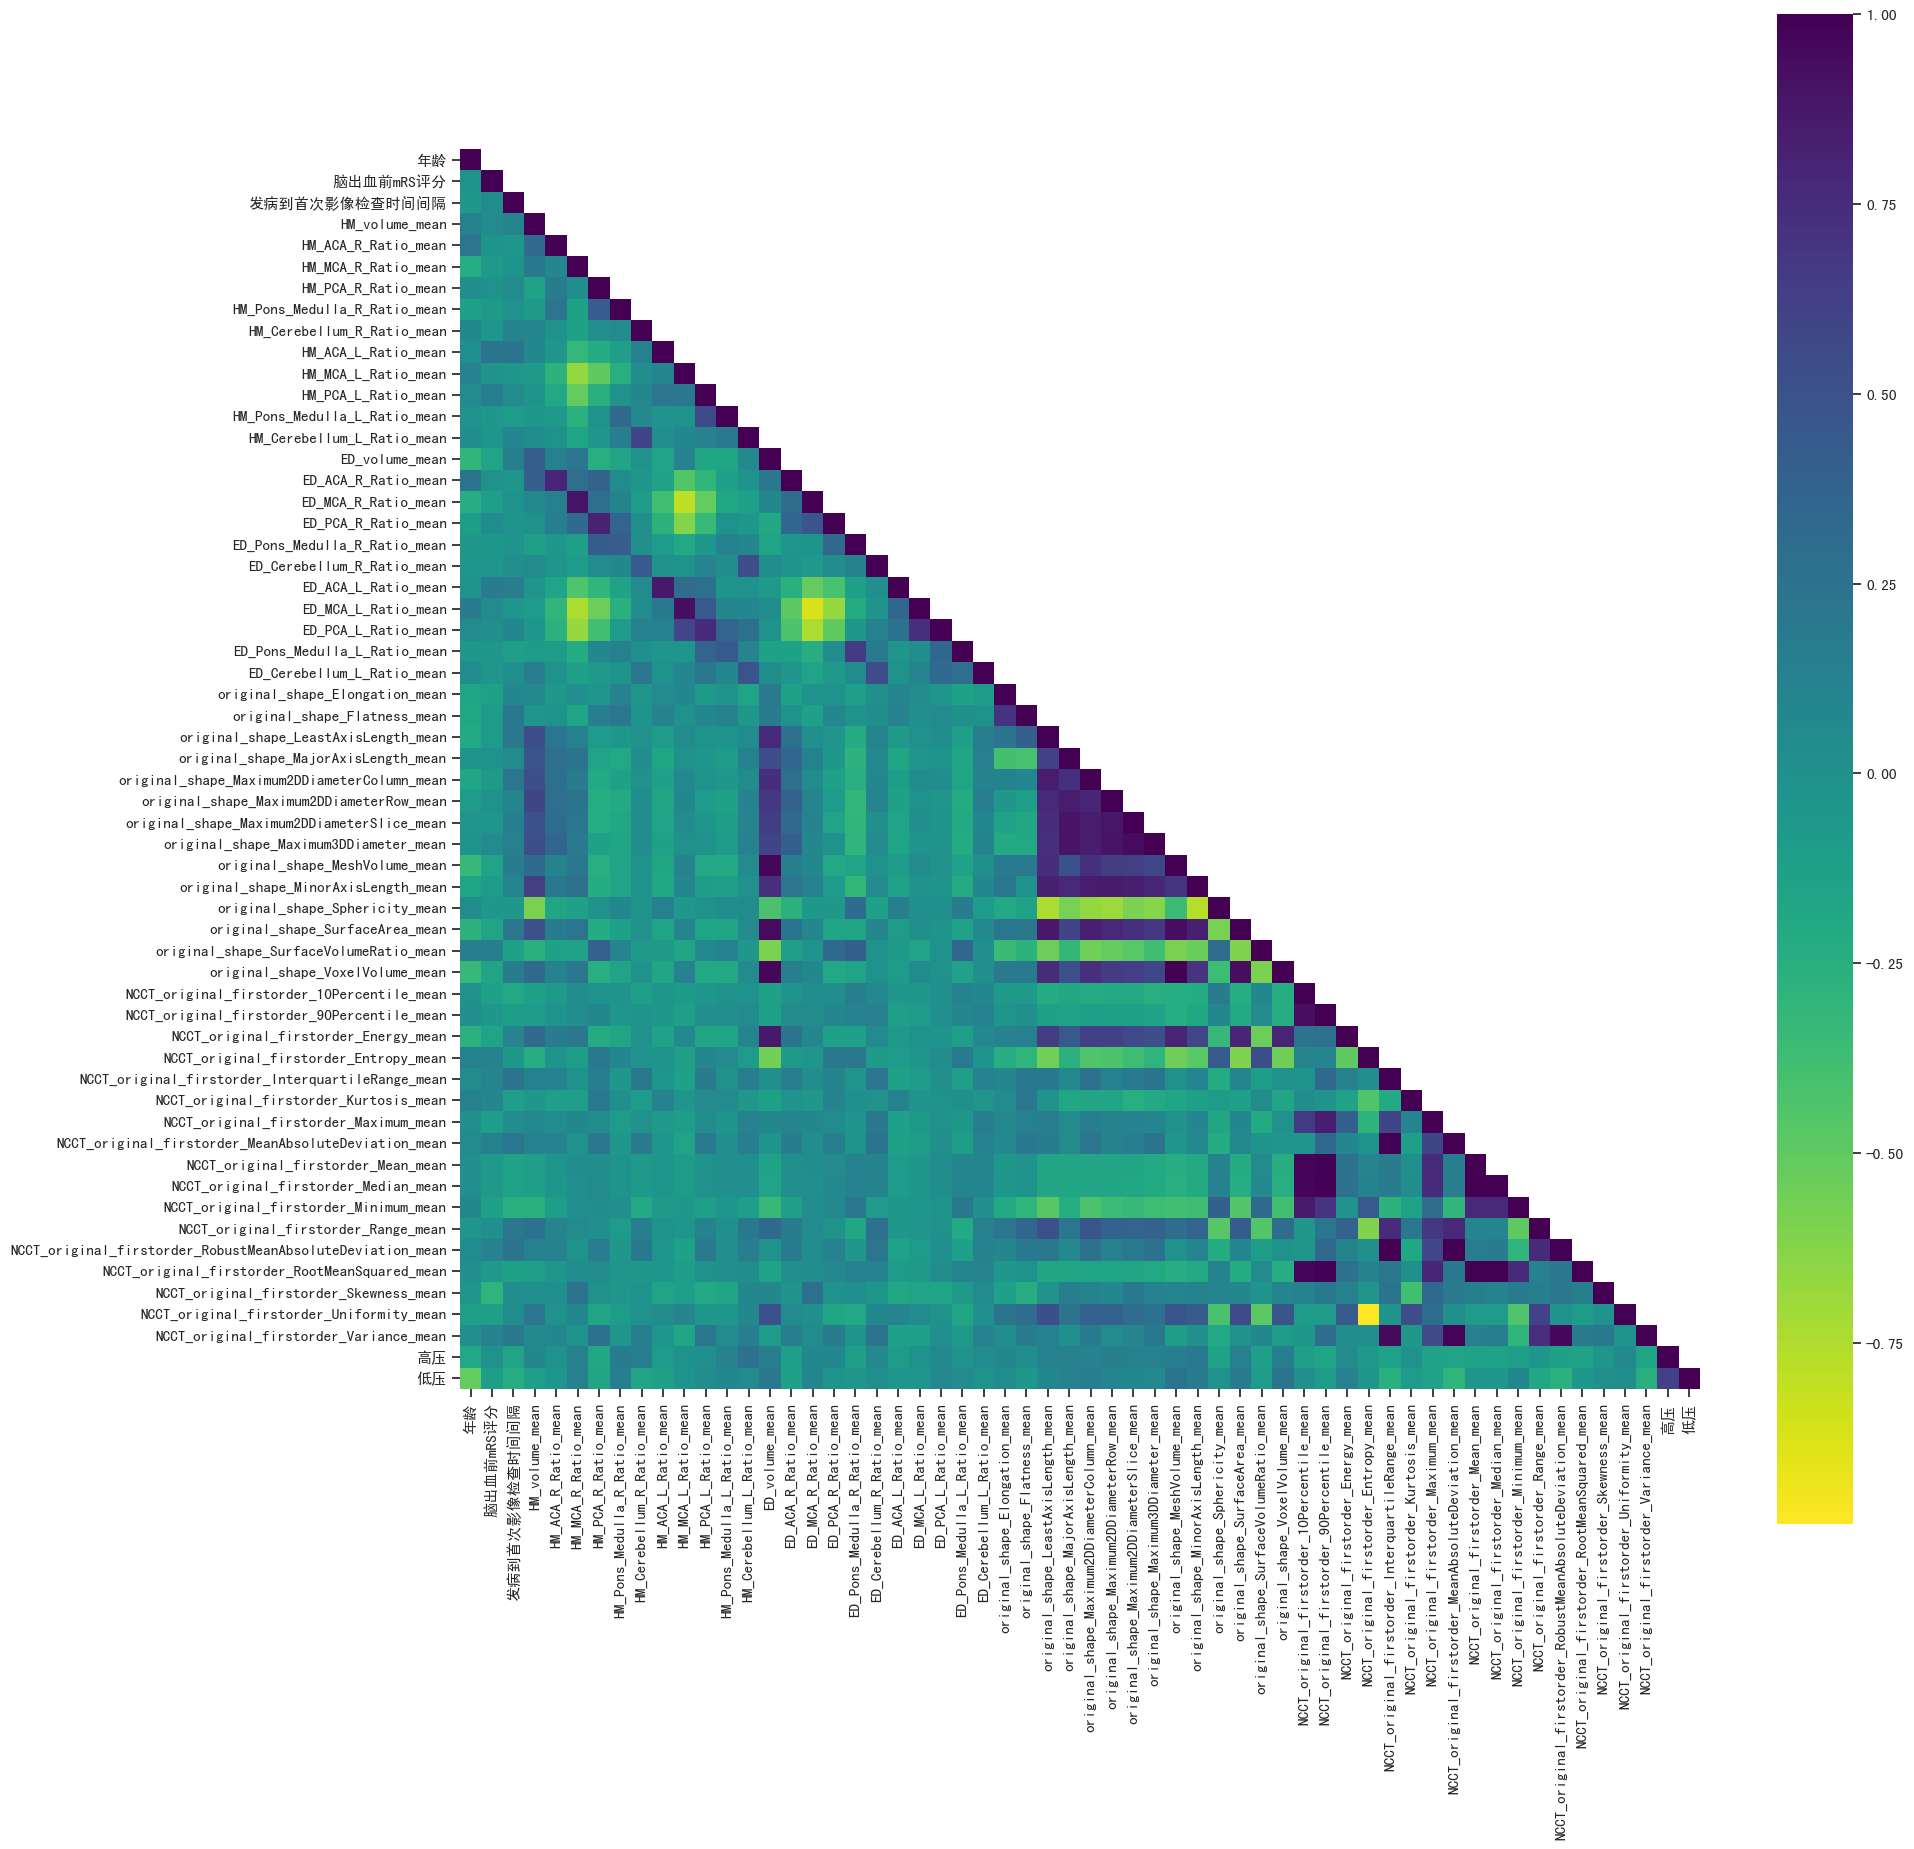

In [19]:
# 热力图
# corrMatt = df.corr()
# mask = np.array(corrMatt)
# mask[np.tril_indices_from(mask)] = False #下三角
# plt.figure(figsize=(20, 20), dpi=100)
# sns.heatmap(corrMatt, mask=mask,vmax=1, square=True,annot=False,cmap='viridis_r')
# plt.show()

# 连续变量与类别关系图

In [20]:
# 矩阵点图
df = train[num_cols + ['90天mRS']]
sns.pairplot(df,hue='species') 

# 类别变量关系图

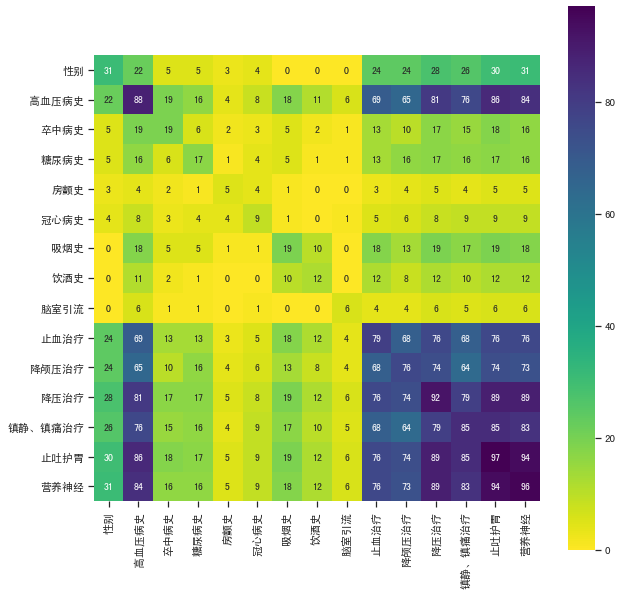

In [21]:
# # 热力图
# def count_num(df, cat1, cat2):
#     count = 0
#     for row in df[cate_cols].iterrows():
#         row = row[1]
#         if row[cat1] + row[cat2] == 2:
#             count += 1
#     return count

# mat = np.zeros((len(cate_cols), len(cate_cols)))
# for index_i, i in enumerate(cate_cols):
#     for index_j, j in enumerate(cate_cols):
#         count_ = count_num(train, i, j)
#         mat[index_i, index_j] = count_

# df_heat = pd.DataFrame(mat,columns=cate_cols)
# df_heat.index = cate_cols

# plt.figure(figsize=(10, 10))
# sns.heatmap(df_heat, square=True,annot=True,cmap='viridis_r')
# plt.show()

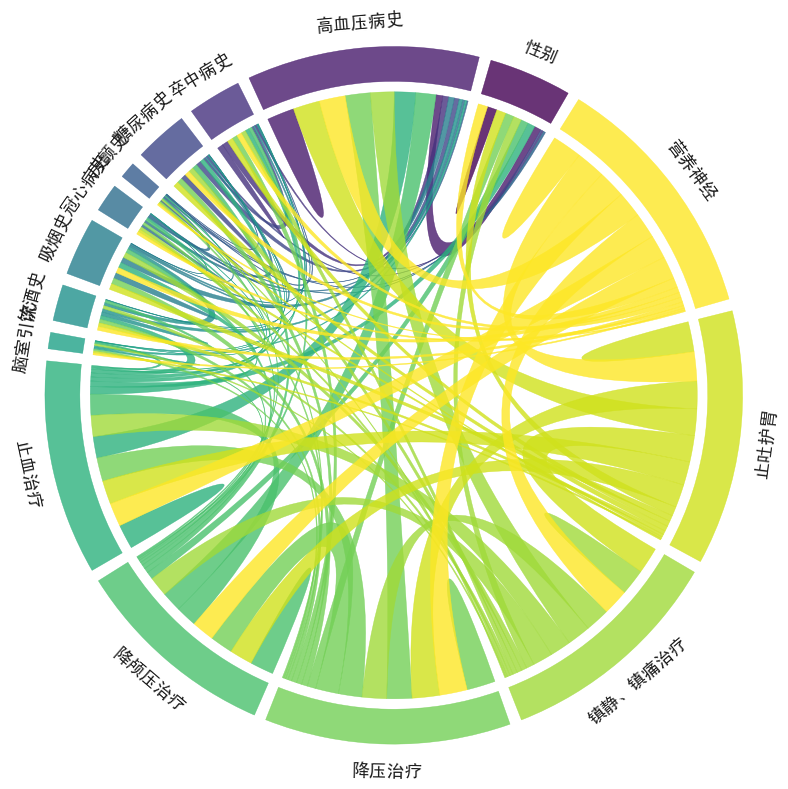

In [22]:
# from mpl_chord_diagram import chord_diagram
# arr_chord = mat
# names = cate_cols
# fig,ax = plt.subplots(figsize=(8,8),dpi=100,facecolor="w")
# chord_diagram = chord_diagram(mat=arr_chord,names=names,alpha=.8,ax=ax,
#                               #colors=['r','pink','lightgreen','y','orange','lightblue'],
#                               start_at=60)
# plt.tight_layout()